<a href="https://colab.research.google.com/github/ToonMath/Bachelor_Master_projects/blob/main/Scientific_computing_set_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.sparse import csr_matrix, linalg
import time


def getmatrix(X, Y, h, numofeigenvectors):
    shape = (int(round(X/h)), int(round(Y/h)))

    # create mapping
    coordindexmap = {}
    indexcoordmap = []
    index = 0
    for i in range(shape[0]):
        for j in range(shape[1]):
            coordindexmap[(i, j)] = index
            indexcoordmap.append((i, j))
            index += 1

    matrix = np.zeros((index, index))
    # fill matrix
    for i in range(index):
        vector = np.zeros((index,))
        x, y = indexcoordmap[i]
        neighbours = (x,y+1), (x,y-1),(x+1,y),(x-1,y)
        for neighbour in neighbours:
            if neighbour in coordindexmap:
                neighbourindex = coordindexmap[neighbour]
                vector[neighbourindex] = 1/h**2
        vector[i] = -4/(h**2)
        matrix[:,i] = vector

    return matrix, shape

def ploteigenvectors(eigenvalues, eigenvectors, shape):
    axes=[]
    fig=plt.figure(figsize=(8*shape[1]/shape[0],8))
    fig.suptitle("eigenvectors corresponding to smallest eigenvalues",size=16,y=.95)
    vmin = eigenvectors.real[:,0:4].min()
    vmax = eigenvectors.real[:,0:4].max()
    for i in range(4):
        axes.append( fig.add_subplot(2, 2, i+1))
        im = plt.imshow(eigenvectors[:,i].real.reshape(shape), vmin=vmin, vmax=vmax)
        axes[-1].set_title("$\lambda = {:.3f}$".format(eigenvalues[i].real))
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05*shape[0]/shape[1], 0.7])
    fig.colorbar(im, cax=cbar_ax)

[[-4.  1.  1.  0.]
 [ 1. -4.  0.  1.]
 [ 1.  0. -4.  1.]
 [ 0.  1.  1. -4.]]
-4 & 1 & 1 & 0 \\ 1 & -4 & 0 & 1 \\ 1 & 0 & -4 & 1 \\ 0 & 1 & 1 & -4 


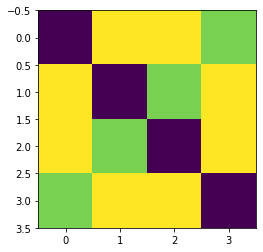

In [ ]:
matrix, shape = getmatrix(2, 2, 1, 1)
message = ""
print(matrix)
for i in range(len(matrix)):
    for j in range(len(matrix[i]) - 1):
        message += "{} & ".format(int(matrix[i,j]))
    message += "{} \\\\ ".format(int(matrix[i,-1]))
print(message[:-3])
plt.imshow(matrix)

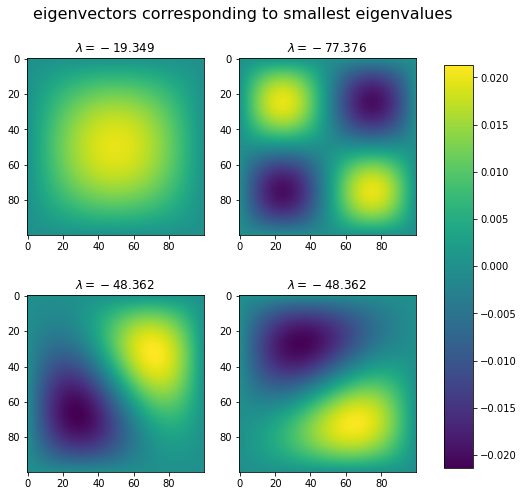

In [ ]:
matrix, shape = getmatrix(1, 1, .01, 1)
test = csr_matrix(matrix)
eigenvalues, eigenvectors = scipy.sparse.linalg.eigs(test, which="SM")
ploteigenvectors(eigenvalues, eigenvectors, shape)

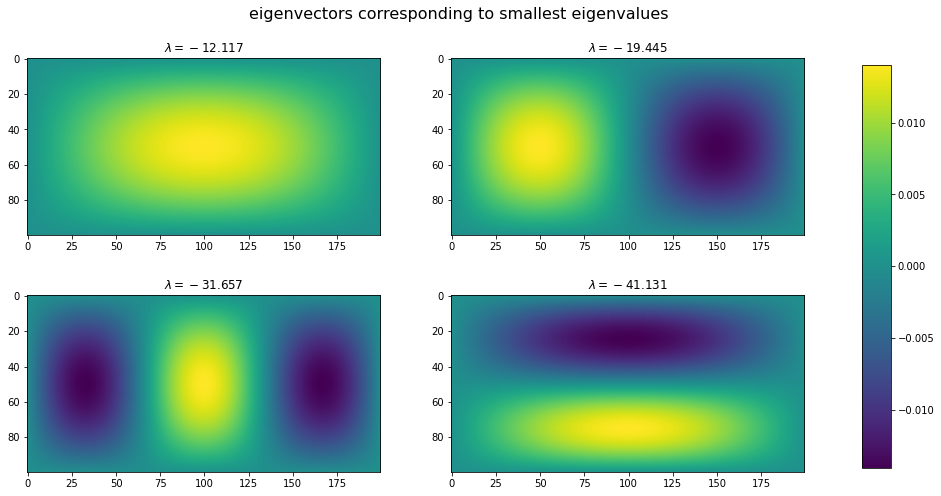

In [ ]:
matrix, shape = getmatrix(1, 2, .01, 1)
test = csr_matrix(matrix)
eigenvalues, eigenvectors = scipy.sparse.linalg.eigs(test, which="SM")
ploteigenvectors(eigenvalues, eigenvectors, shape)

In [ ]:
def getroundmatrix(X, Y, h, center, radius):
    shape = (int(round(X/h)), int(round(Y/h)))
    radius = radius/h
    centerindex = int(round(center[0]/h)), int(round(center[1]/h))
    coordindexmap = {}
    indexcoordmap = []
    index = 0
    for i in range(shape[0]):
        diffx = abs(i - centerindex[0])
        for j in range(shape[1]):
            diffy = abs(j - centerindex[1])
            if diffx**2 + diffy**2 < radius**2:
                coordindexmap[(i, j)] = index
                indexcoordmap.append((i, j))
                index += 1

    matrix = np.zeros((index, index))
    # fill matrix
    for i in range(index):
        vector = np.zeros((index,))
        x, y = indexcoordmap[i]
        neighbours = (x,y+1), (x,y-1),(x+1,y),(x-1,y)
        for neighbour in neighbours:
            if neighbour in coordindexmap:
                neighbourindex = coordindexmap[neighbour]
                vector[neighbourindex] += 1/h**2
        vector[i] -= 4/h**2
        matrix[:,i] = vector

    return matrix, shape, indexcoordmap

def plotroundeigenvectors(eigenvalues, eigenvectors, shape, indexcoordmap):
    axes=[]
    fig=plt.figure(figsize=(8*shape[1]/shape[0],8))
    fig.suptitle("eigenvectors corresponding to smallest eigenvalues",size=16,y=.95)
    vmin = eigenvectors[:,0:4].real.min()
    vmax = eigenvectors[:,0:4].real.max()
    grid = np.zeros((shape[0], shape[1]))

    for i in range(4):
        for index in range(len(indexcoordmap)):
            x,y = indexcoordmap[index]
            grid[x,y] = eigenvectors[index,i]
        axes.append( fig.add_subplot(2, 2, i+1))
        im = plt.imshow(grid, vmin=vmin, vmax=vmax)
        axes[-1].set_title("$\lambda = {:.3f}$".format(eigenvalues[i].real))
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05*shape[0]/shape[1], 0.7])
    fig.colorbar(im, cax=cbar_ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: ComplexWarning: Casting complex values to real discards the imaginary part


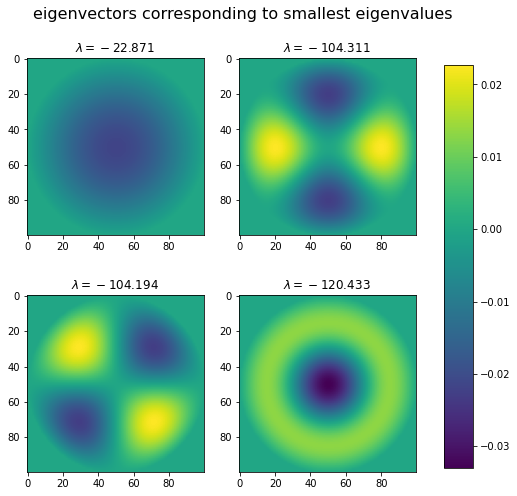

In [ ]:
matrix, shape, indexcoordmap = getroundmatrix(1,1,.01,(.5,.5), .5)
test = csr_matrix(matrix)
eigenvalues, eigenvectors = scipy.sparse.linalg.eigs(test, which="SM")
plotroundeigenvectors(eigenvalues, eigenvectors, shape, indexcoordmap)

In [ ]:
import time
resolutions = [.05, .04, .03, .02, .01]
dense = []
densesym = []
sparse = []
sparsesym = []
for resolution in resolutions:
    print(resolution)
    print("Calculating for ", resolution)
    matrix, shape = getmatrix(1, 1, resolution, 1)
    test = csr_matrix(matrix)

    t1 = time.time()
    eigenvalues, eigenvectors = scipy.linalg.eig(matrix)
    t2 = time.time()
    print("Dense",t2 - t1)
    dense.append(t2 - t1)

    t1 = time.time()
    eigenvalues, eigenvectors = scipy.linalg.eigh(matrix)
    t2 = time.time()
    print("Dense symmetric",t2 - t1)
    densesym.append(t2 - t1)

    t1 = time.time()
    eigenvalues, eigenvectors = scipy.sparse.linalg.eigs(test, which="SM")
    t2 = time.time()
    print("Sparse",t2 - t1)
    sparse.append(t2 - t1)

    t1 = time.time()
    eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(test, which="SM")
    t2 = time.time()
    sparsesym.append(t2 - t1)
    print("Sparse symmetric",t2 - t1)


0.05
Calculating for  0.05
Dense 0.18530511856079102
Dense symmetric 0.11744976043701172
Sparse 0.02901625633239746
Sparse symmetric 0.02357339859008789
0.04
Calculating for  0.04
Dense 0.6739428043365479
Dense symmetric 0.24901175498962402
Sparse 0.05095505714416504
Sparse symmetric 0.0381162166595459
0.03
Calculating for  0.03
Dense 2.143444776535034
Dense symmetric 0.8189513683319092
Sparse 0.0717167854309082
Sparse symmetric 0.0582880973815918
0.02
Calculating for  0.02
Dense 19.81747031211853
Dense symmetric 6.357297420501709
Sparse 0.174208402633667
Sparse symmetric 0.13518118858337402
0.01
Calculating for  0.01
Dense 929.3961985111237
Dense symmetric 1040.8978817462921
Sparse 1.016176700592041
Sparse symmetric 1.0097131729125977


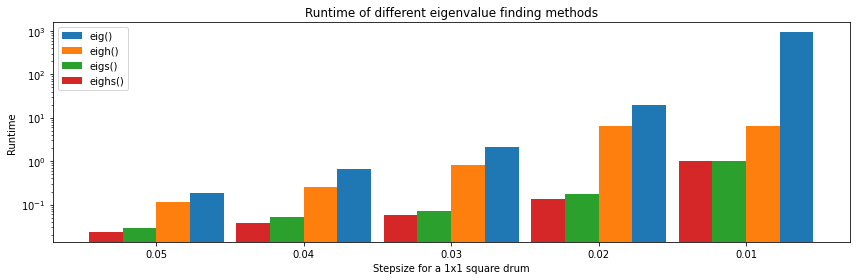

In [ ]:
resolutions = [.05, .04, .03, .02, .01]
dense = [0.1853, 0.673942, 2.14344, 19.81747, 929.39]
densesym = [0.117449, 0.24901, 0.818951, 6.357297, 6.357297]
sparse = [0.029016, 0.05095,0.07171, 0.17420,1.01617]
sparsesym = [0.02357,0.03811, 0.05828, 0.135181, 1.0097]

x = np.arange(len(resolutions))*3.5
width = .8
fig, ax = plt.subplots(figsize=(12,4))
densebar = ax.bar(x + 1.5*width, dense, width, label='eig()')
densesymbar = ax.bar(x + width/2, densesym, width, label='eigh()')
sparse = ax.bar(x - width/2, sparse, width, label='eigs()')
sparsesym = ax.bar(x -1.5*width, sparsesym, width, label='eighs()')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Runtime')
ax.set_xlabel("Stepsize for a 1x1 square drum")
ax.set_title('Runtime of different eigenvalue finding methods')
ax.set_xticklabels(resolutions)
ax.legend()
plt.yscale("log")


fig.tight_layout()


(-50.0, 0.0)

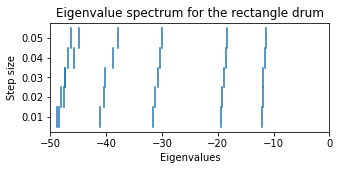

In [ ]:
fig, ax = plt.subplots(figsize=(5,2))
resolutions = [.05, .04, .03, .02, .01]
x = np.arange(len(resolutions))
ax.set_yticks([.5, 1.5, 2.5,3.5, 4.5, 5.5])
ax.set_yticklabels(resolutions[::-1])

for i in range(len(resolutions)):
    matrix, shape = getmatrix(1, 2, resolutions[::-1][i], 1)
    test = csr_matrix(matrix)
    eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(test, which="SM")
    for eigenvalue in eigenvalues:
        plt.plot([eigenvalue, eigenvalue], [i, i+1], color='C0')
plt.title("Eigenvalue spectrum for the rectangle drum")
plt.xlabel("Eigenvalues")
plt.ylabel("Step size")
plt.xlim([-50,0])

(-100.0, 0.0)

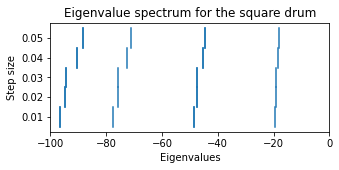

In [ ]:
fig, ax = plt.subplots(figsize=(5,2))
resolutions = [.05, .04, .03, .02, .01]
x = np.arange(len(resolutions))
ax.set_yticks([.5, 1.5, 2.5,3.5, 4.5, 5.5])
ax.set_yticklabels(resolutions[::-1])

for i in range(len(resolutions)):
    matrix, shape = getmatrix(1, 1, resolutions[::-1][i], 1)
    test = csr_matrix(matrix)
    eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(test, which="SM")
    for eigenvalue in eigenvalues:
        plt.plot([eigenvalue, eigenvalue], [i, i+1], color='C0')
plt.title("Eigenvalue spectrum for the square drum")
plt.xlabel("Eigenvalues")
plt.ylabel("Step size")
plt.xlim([-100,0])

(-125.0, 0.0)

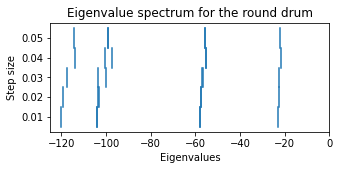

In [ ]:
fig, ax = plt.subplots(figsize=(5,2))
resolutions = [.05, .04, .03, .02, .01]
x = np.arange(len(resolutions))
ax.set_yticks([.5, 1.5, 2.5,3.5, 4.5, 5.5])
ax.set_yticklabels(resolutions[::-1])

for i in range(len(resolutions)):
    matrix, shape,_ = getroundmatrix(1,1,resolutions[::-1][i],(.5,.5), .5)
    test = csr_matrix(matrix)
    eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(test, which="SM")
    for eigenvalue in eigenvalues:
        plt.plot([eigenvalue, eigenvalue], [i, i+1], color='C0')
plt.title("Eigenvalue spectrum for the round drum")
plt.xlabel("Eigenvalues")
plt.ylabel("Step size")
plt.xlim([-125,0])

Text(0, 0.5, 'Amplitude')

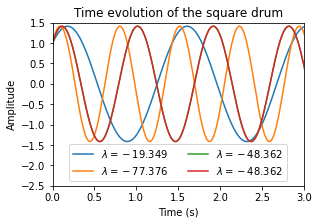

In [ ]:
def getTimeSolution(K,c, A, B, time):
    l = (abs(K))**.5
    return [A*np.cos(c*l*i) + B*np.sin(c*l*i) for i in time]
plt.subplots(figsize=(4.5,3))
matrix, shape = getmatrix(1, 1, .01, 1)
test = csr_matrix(matrix)
eigenvalues, eigenvectors = scipy.sparse.linalg.eigs(test, which="SM")
time = np.arange(0, 4.1, .01)
plt.xlim([0,3])
for eigenvalue in eigenvalues[:4]:

    timesolution = getTimeSolution(eigenvalue, 1, 1, 1, time)
    plt.plot(time, timesolution, label="$\lambda = {:.3f}$".format(eigenvalue.real))
plt.legend(loc='lower center',ncol=2)
plt.ylim([-2.5,1.5])
plt.title("Time evolution of the square drum")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

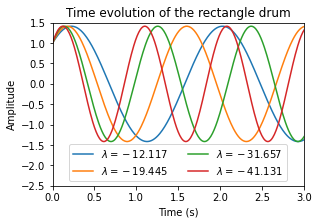

In [ ]:
plt.subplots(figsize=(4.5,3))
matrix, shape = getmatrix(1, 2, .01, 1)
test = csr_matrix(matrix)
eigenvalues, eigenvectors = scipy.sparse.linalg.eigs(test, which="SM")
time = np.arange(0, 3.1, .01)
plt.xlim([0,3])
for eigenvalue in eigenvalues[:4]:

    timesolution = getTimeSolution(eigenvalue, 1, 1, 1, time)
    plt.plot(time, timesolution, label="$\lambda = {:.3f}$".format(eigenvalue.real))
plt.legend(loc='lower center',ncol=2)
plt.ylim([-2.5,1.5])
plt.title("Time evolution of the rectangle drum")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

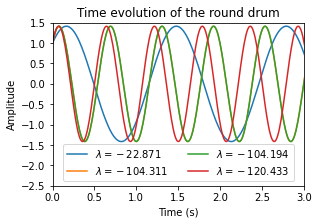

In [ ]:
plt.subplots(figsize=(4.5 ,3))
matrix, bull, shit = getroundmatrix(1,1,.01,(.5,.5), .5)
test = csr_matrix(matrix)
eigenvalues, eigenvectors = scipy.sparse.linalg.eigs(test, which="SM")
time = np.arange(0, 3.1, .01)
plt.xlim([0,3])
for eigenvalue in eigenvalues[:4]:

    timesolution = getTimeSolution(eigenvalue, 1, 1, 1, time)
    plt.plot(time, timesolution, label="$\lambda = {:.3f}$".format(eigenvalue.real))
plt.legend(loc='lower center',ncol=2)
plt.ylim([-2.5,1.5])
plt.title("Time evolution of the round drum")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")